In [1]:
# Infer LORA
import torch
from huggingface_hub.repocard import RepoCard
from diffusers import StableDiffusionPipeline

lora_model_id = "codyreading/dreamboothlora-car"
card = RepoCard.load(lora_model_id)
base_model_id = card.data.to_dict()["base_model"]

pipe = StableDiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")
pipe.load_lora_weights(lora_model_id)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


: 

  0%|          | 0/35 [00:00<?, ?it/s]

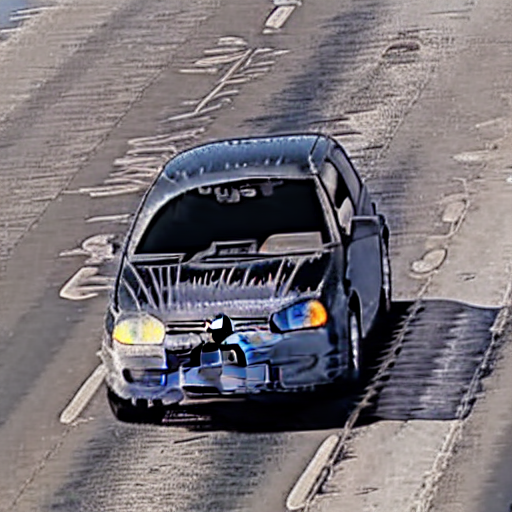

In [18]:
image = pipe("A photo of sks car on a road", num_inference_steps=35).images[0]
image